In [1]:
import numpy as np
import pandas as pd

In [2]:
sms = pd.read_csv('sms_spam_collection.csv')

In [3]:
sms

,Unnamed: 0,label,message
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...
5567,5567,spam,This is the 2nd time we have tried 2 contact u...
5568,5568,ham,Will ü b going to esplanade fr home?
5569,5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
sms.label.value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

## Text Preprocessing

Method :
1. COnverting to lower case
1. Contraction
1. Remove or convert number into text
1. remove punctuation
1. remove white space
1. remove stopwords and particular words

## 1. Converting to lower case

In [5]:
def to_lower(text):
    return text.lower()

In [6]:
text_1 = 'Summer December 10th 2019'
to_lower(text_1)

'summer december 10th 2019'

## 2. Contraction

In [7]:
import re

In [8]:
contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def main_contraction(text):
    text = expand_contractions(text, contractions_dict)
    return text

In [9]:
text_2 = "If I ain't got you"
main_contraction(text_2)

'If I am not got you'

## 3. Remove or Convert Number Into Text

In [10]:
def remove_numbers(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

In [11]:
text_3 = 'I was born in 1991'
remove_numbers(text_3)

'I was born in '

## 4. Remove Punctuation

In [12]:
from string import punctuation

In [13]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def remove_punctuation(text):
    return ''.join(c for c in text if c not in punctuation)

In [15]:
text_4 = 'Pelajaran ini kenapa terburu-buru sekali ya ?'
remove_punctuation(text_4)

'Pelajaran ini kenapa terburuburu sekali ya '

## 5. Remove White Space

In [16]:
def to_strip(text):
    return ' '.join(text.split())

In [17]:
text_5 = 'There         was     bobby, alex, fergie, and Ai me'
to_strip(text_5)

'There was bobby, alex, fergie, and Ai me'

## 6. Remove Stopwords

In [18]:
import nltk
from nltk.corpus import stopwords

In [19]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
print(stopwords.words('indonesian'))
print(stopwords.words('english'))

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

In [21]:
def remove_stopwords(sentence):
    stop_words = stopwords.words('english')
    return ' '.join(w for w in nltk.word_tokenize(sentence) if not w in stop_words)

In [22]:
text_6 = 'There was bobby, alex, fergie, and I'
remove_stopwords(text_6)

'There bobby , alex , fergie , I'

## Menggabungkan ke 6 fitur ini

In [23]:
def text_preprocessing(sentence):
    prep1 = to_lower(sentence)
    prep2 = main_contraction(prep1)
    prep3 = remove_numbers(prep2)
    prep4 = remove_punctuation(prep3)
    prep5 = to_strip(prep4)
    prep6 = remove_stopwords(prep5)
    return prep6

In [24]:
text_7 = 'There was bobby, alex, fergie, and I'
text_preprocessing(text_7)

'bobby alex fergie'

In [25]:
sms['message_clean']=sms['message'].apply(text_preprocessing)
sms

,Unnamed: 0,label,message,message_clean
0,0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though
...,...,...,...,...
5567,5567,spam,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u £ pound prize claim ...
5568,5568,ham,Will ü b going to esplanade fr home?,ü b going esplanade fr home
5569,5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestions
5570,5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


## Text Preprocessing 2

## Stemming

In [26]:
from nltk.stem import SnowballStemmer
from tqdm import tqdm

In [27]:
snowball_stemmer = SnowballStemmer('english')

def stem(text):
    stemmed_word = [snowball_stemmer.stem(word) for sent in (nltk.sent_tokenize(text)) for word in (nltk.word_tokenize(sent))]
    return ' '.join(stemmed_word)

In [28]:
text_9 = 'There she goes. Here I am'

In [29]:
text_8 = 'I am reading a book and the book is very fascinating'
stem(text_8)

'i am read a book and the book is veri fascin'

In [30]:
stem('caring')

'care'

## Lemmatization

In [31]:
from nltk.stem import WordNetLemmatizer

In [32]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
wordnet_lemma = WordNetLemmatizer()
def lemmatize(text):
    lemmatized_word = [wordnet_lemma.lemmatize(word) for sent in (nltk.sent_tokenize(text)) for word in (nltk.word_tokenize(sent))]
    return ' '.join(lemmatized_word)

In [34]:
lemmatize(text_8)

'I am reading a book and the book is very fascinating'

In [35]:
lemmatize('carefully')

'carefully'

In [36]:
print(stem(text_9))
print(lemmatize(text_9))

there she goe . here i am
There she go . Here I am


In [37]:
sms['message_stem']=sms['message_clean'].apply(stem)
sms['message_lemma']=sms['message_clean'].apply(lemmatize)
sms[['message_stem','message_lemma']].head()

,message_stem,message_lemma
0,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,ok lar joke wif u oni,ok lar joking wif u oni
2,free entri wkli comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...
3,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,nah think goe usf live around though,nah think go usf life around though


## Text Exploration

### Word Freq

In [38]:
import seaborn as sns

In [39]:
def kamus(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()

    kamus = {'kata':check.index,'freq':check.values}
    kamus = pd.DataFrame(kamus)
    kamus.index = kamus['kata']
    kamus.drop('kata', axis = 1, inplace = True)
    kamus.sort_values('freq',ascending=False,inplace=True)
    
    return kamus

In [40]:
# check = pd.Series(['there she goes, here i am','there she goes, here i go'])
# check = check.str.extractall('([a-zA_Z]+)')
# check.columns = ['check']
# b = check.reset_index(drop=True)
# check = b['check'].value_counts()

# kamus = {'kata':check.index,'freq':check.values}
# kamus = pd.DataFrame(kamus)
# kamus.index = kamus['kata']
# kamus.drop('kata', axis = 1, inplace = True)
# kamus.sort_values('freq',ascending=False,inplace=True)

# kamus

In [41]:
kamus_clean = kamus(sms['message_lemma'])
kamus_clean

,freq
kata,
u,1226
call,605
get,401
ur,390
go,311
...,...
threat,1
tagged,1
blanked,1


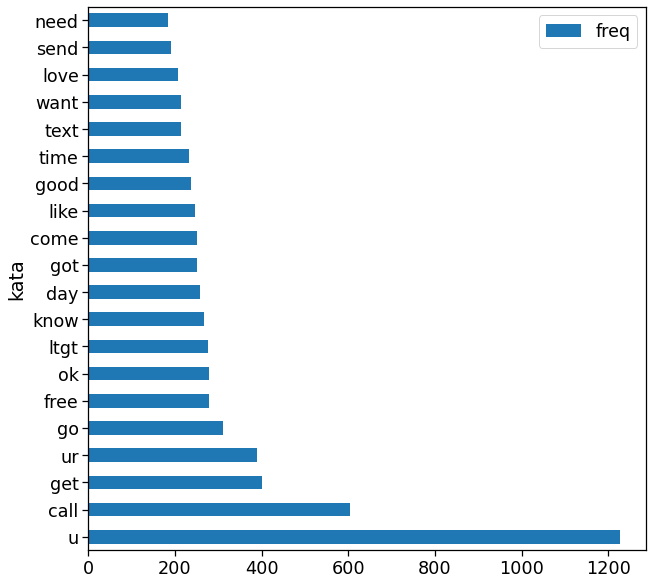

In [42]:
sns.set_context(context='notebook',font_scale=1.6)
kamus_clean[:20].plot(kind='barh',figsize=(10,10))

### Word Cloud

In [43]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [45]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(20,30))
    plt.imshow(wordcloud)
    plt.axis('off')

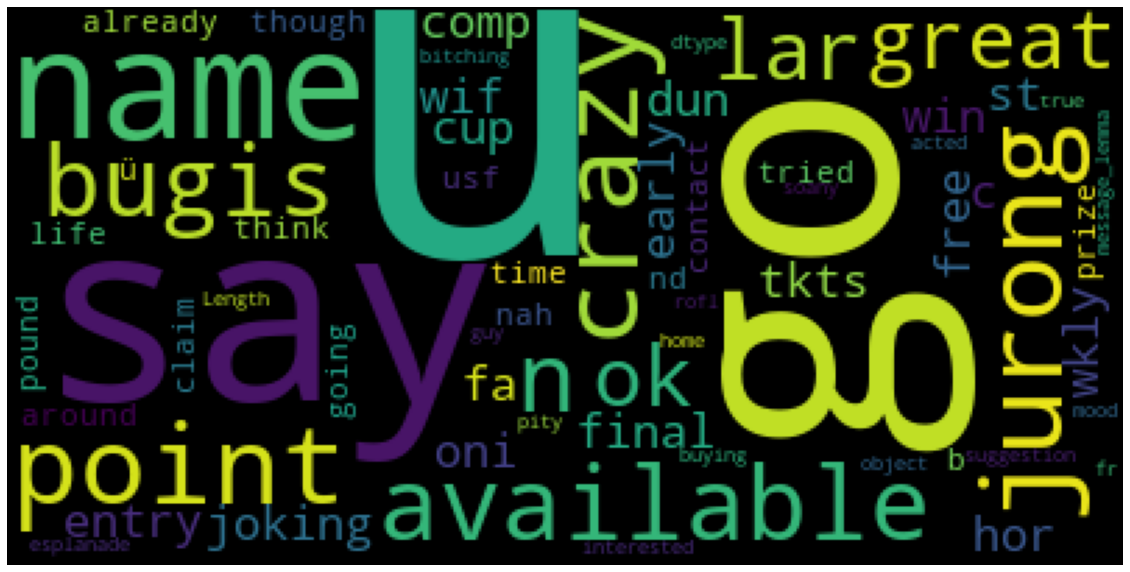

In [46]:
word_cloud = WordCloud().generate(str(sms['message_lemma']))
plot_cloud(word_cloud)

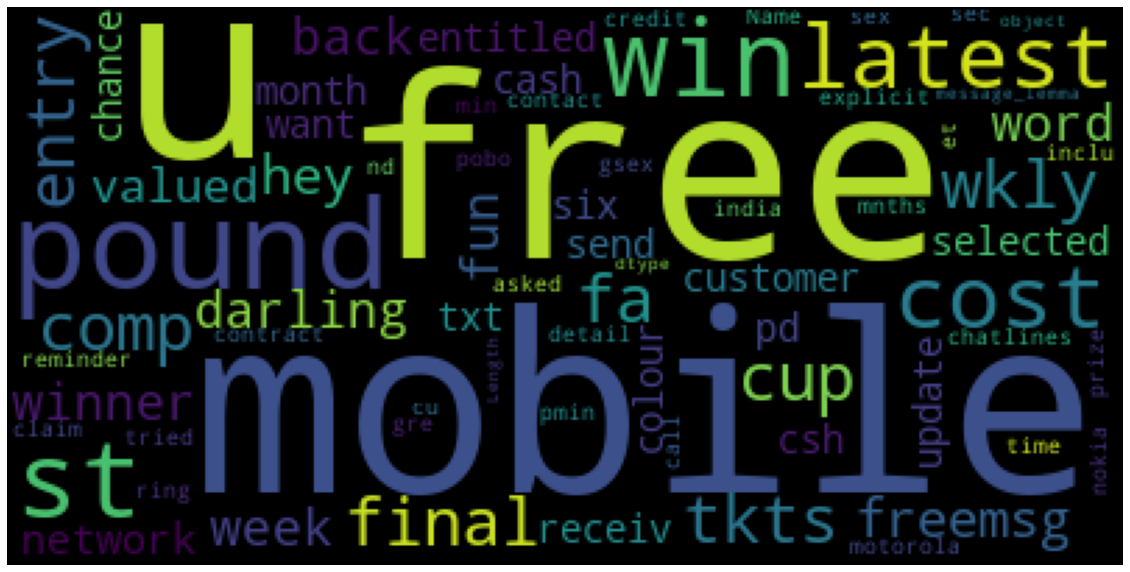

In [47]:
word_cloud_spam = WordCloud().generate(str(sms[sms['label']=='spam']['message_lemma']))
plot_cloud(word_cloud_spam)

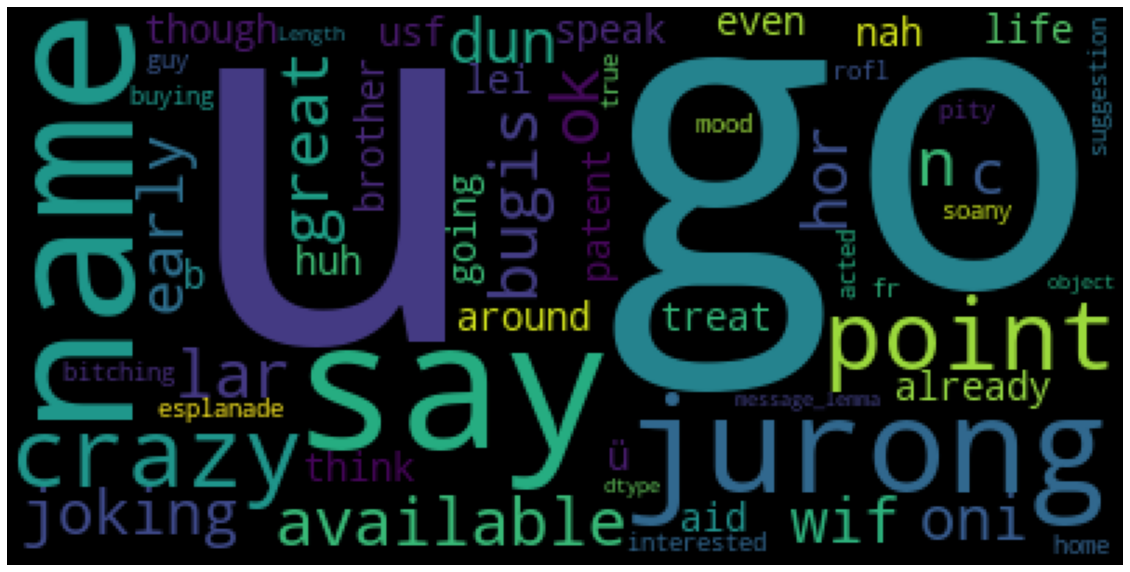

In [48]:
word_cloud_ham = WordCloud().generate(str(sms[sms['label']=='ham']['message_lemma']))
plot_cloud(word_cloud_ham)

## Length of Sentence

In [49]:
sms['length']=sms['message'].apply(len)

C:\Users\johan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\johan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


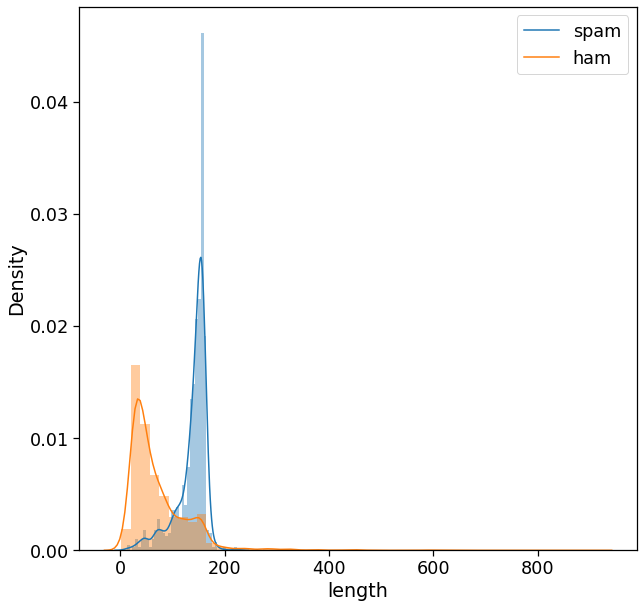

In [50]:
plt.figure(figsize=(10,10))
sms_spam = sms[sms['label']=='spam']
sms_ham = sms[sms['label']=='ham']

sns.distplot(sms_spam['length'])
sns.distplot(sms_ham['length'])

plt.legend(['spam','ham'])
plt.show()

In [51]:
sms_spam[sms_spam['length']==sms_spam['length'].max()]

,Unnamed: 0,label,message,message_clean,message_stem,message_lemma,length
1734,1734,spam,"Hi, this is Mandy Sullivan calling from HOTMIX...",hi mandy sullivan calling hotmix fmyou chosen ...,hi mandi sullivan call hotmix fmyou chosen rec...,hi mandy sullivan calling hotmix fmyou chosen ...,223


C:\Users\johan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\johan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


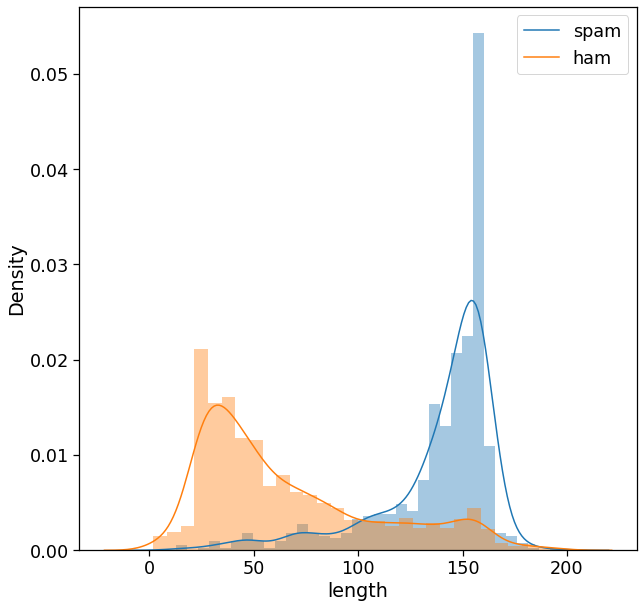

In [52]:
plt.figure(figsize=(10,10))

sms2 = sms[sms['length']<200]
sms2_spam = sms2[sms2['label']=='spam']
sms2_ham = sms2[sms2['label']=='ham']

sns.distplot(sms2_spam['length'])
sns.distplot(sms2_ham['length'])

plt.legend(['spam','ham'])

plt.show()

## Document Term Matrix

In [53]:
words_example = ["You already know me, dont you?",
                "I am the best there is"]

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
vect = CountVectorizer()
vect_2 = CountVectorizer(preprocessor=text_preprocessing)
vect.fit(words_example)

CountVectorizer()

In [78]:
print(f'Vocab size {len(vect.vocabulary_)}')
print(f'Vocab Content {(vect.vocabulary_)}')

Vocab size 10
Vocab Content {'you': 9, 'already': 0, 'know': 5, 'me': 6, 'dont': 3, 'am': 1, 'the': 7, 'best': 2, 'there': 8, 'is': 4}


In [79]:
dtm = vect.transform(words_example)

In [80]:
dtm.toarray()

array([[1, 0, 0, 1, 0, 1, 1, 0, 0, 2],
       [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]], dtype=int64)

In [81]:
vect.get_feature_names()

['already', 'am', 'best', 'dont', 'is', 'know', 'me', 'the', 'there', 'you']

In [82]:
dtm = pd.DataFrame(dtm.toarray(),columns = vect.get_feature_names())
dtm['text']=words_example
dtm

,already,am,best,dont,is,know,me,the,there,you,text
0,1,0,0,1,0,1,1,0,0,2,"You already know me, dont you?"
1,0,1,1,0,1,0,0,1,1,0,I am the best there is


## N-Grams

In [83]:
words_example

['You already know me, dont you?', 'I am the best there is']

In [84]:
vect2 = CountVectorizer(ngram_range=(1,2))
vect2.fit(words_example)

CountVectorizer(ngram_range=(1, 2))

In [85]:
print(f'Vocabulary size : {len(vect2.vocabulary_)}')
print(f'Vocabulary Content :\n {vect2.vocabulary_}')

Vocabulary size : 19
Vocabulary Content :
 {'you': 17, 'already': 0, 'know': 9, 'me': 11, 'dont': 6, 'you already': 18, 'already know': 1, 'know me': 10, 'me dont': 12, 'dont you': 7, 'am': 2, 'the': 13, 'best': 4, 'there': 15, 'is': 8, 'am the': 3, 'the best': 14, 'best there': 5, 'there is': 16}


In [86]:
dtm2 = vect2.transform(words_example)
dtm2.toarray()

array([[1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1],
       [0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0]],
      dtype=int64)

In [87]:
vect2.get_feature_names()

['already',
 'already know',
 'am',
 'am the',
 'best',
 'best there',
 'dont',
 'dont you',
 'is',
 'know',
 'know me',
 'me',
 'me dont',
 'the',
 'the best',
 'there',
 'there is',
 'you',
 'you already']

In [88]:
dtm2 = pd.DataFrame(dtm2.toarray(),columns = vect2.get_feature_names())
dtm2['text']=words_example
dtm2

,already,already know,am,am the,best,best there,dont,dont you,is,know,know me,me,me dont,the,the best,there,there is,you,you already,text
0,1,1,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,2,1,"You already know me, dont you?"
1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,1,1,1,0,0,I am the best there is


## TF-IDF

In [89]:
words_example

['You already know me, dont you?', 'I am the best there is']

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [91]:
vect = TfidfVectorizer()
vect.fit(words_example)

TfidfVectorizer()

In [93]:
print(f'Vocabulary size : {len(vect.vocabulary_)}')
print(f'Vocabulary Content :\n {vect.vocabulary_}')

Vocabulary size : 10
Vocabulary Content :
 {'you': 9, 'already': 0, 'know': 5, 'me': 6, 'dont': 3, 'am': 1, 'the': 7, 'best': 2, 'there': 8, 'is': 4}


In [94]:
dtm_tf_idf = vect.transform(words_example)
dtm_tf_idf.toarray()

array([[0.35355339, 0.        , 0.        , 0.35355339, 0.        ,
        0.35355339, 0.35355339, 0.        , 0.        , 0.70710678],
       [0.        , 0.4472136 , 0.4472136 , 0.        , 0.4472136 ,
        0.        , 0.        , 0.4472136 , 0.4472136 , 0.        ]])

In [95]:
vect.get_feature_names()

['already', 'am', 'best', 'dont', 'is', 'know', 'me', 'the', 'there', 'you']

In [96]:
dtm_tf_idf = pd.DataFrame(dtm_tf_idf.toarray(),columns = vect.get_feature_names())
dtm_tf_idf['text']=words_example
dtm_tf_idf

,already,am,best,dont,is,know,me,the,there,you,text
0,0.353553,0.000000,0.000000,0.353553,0.000000,0.353553,0.353553,0.000000,0.000000,0.707107,"You already know me, dont you?"
1,0.000000,0.447214,0.447214,0.000000,0.447214,0.000000,0.000000,0.447214,0.447214,0.000000,I am the best there is


## Spam Detector

### Data Splitting

In [97]:
from sklearn.model_selection import train_test_split

In [102]:
text = sms['message_lemma']
y = np.where(sms['label']=='spam',1,0)

In [103]:
text_train, text_test, y_train, y_test = train_test_split(text,y)

### Fit & Transform Method

In [104]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
X_test = vect.transform(text_test)

In [105]:
vect.get_feature_names()[:10]

['aa',
 'aah',
 'aaniye',
 'aathilove',
 'aathiwhere',
 'ab',
 'abbey',
 'abelu',
 'abi',
 'ability']

In [106]:
vect.get_feature_names()[-10:]

['zf',
 'zhong',
 'zindgi',
 'zoe',
 'zogtorius',
 'zoom',
 'zouk',
 'zyada',
 'üll',
 '〨ud']

### Text Classification

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [108]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [109]:
y_pred = model.predict(X_test)

In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1197
           1       0.98      0.81      0.89       196

    accuracy                           0.97      1393
   macro avg       0.97      0.90      0.93      1393
weighted avg       0.97      0.97      0.97      1393



In [111]:
model_nb = MultinomialNB()
model_nb.fit(X_train,y_train)
y_pred_nb = model_nb.predict(X_test)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1197
           1       0.93      0.89      0.91       196

    accuracy                           0.97      1393
   macro avg       0.95      0.94      0.95      1393
weighted avg       0.97      0.97      0.97      1393



In [112]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [114]:
tf_idf_prep = TfidfVectorizer()
model = MultinomialNB()
pipe = Pipeline([
    ('preprocess',tf_idf_prep),
    ('model',model)
])

param_grid = {
    'model__alpha':np.linspace(0, 1, 10)
}
grid = GridSearchCV(pipe,param_grid, cv=5)

In [115]:
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             param_grid={'model__alpha': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])})

In [116]:
grid.fit(text_train, y_train)

C:\Users\johan\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\johan\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\johan\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\johan\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\johan\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in n

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             param_grid={'model__alpha': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])})

In [117]:
grid.best_estimator_

Pipeline(steps=[('preprocess', TfidfVectorizer()),
                ('model', MultinomialNB(alpha=0.1111111111111111))])

In [118]:
grid.best_score_

0.9806157063862704

### Sebelum di tune

In [121]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1197
           1       0.93      0.89      0.91       196

    accuracy                           0.97      1393
   macro avg       0.95      0.94      0.95      1393
weighted avg       0.97      0.97      0.97      1393



In [123]:
from sklearn.metrics import confusion_matrix

In [124]:
confusion_matrix(y_test,y_pred_nb)

array([[1183,   14],
       [  22,  174]], dtype=int64)

### Setelah di tune

In [120]:
nb_tuned = grid.best_estimator_.fit(text_train, y_train)
y_tuned_predict = nb_tuned.predict(text_test)
print(classification_report(y_tuned_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1219
           1       0.87      0.98      0.92       174

    accuracy                           0.98      1393
   macro avg       0.93      0.98      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [125]:
confusion_matrix(y_test,y_tuned_predict)

array([[1194,    3],
       [  25,  171]], dtype=int64)